# Sleep Health & Lifestyle Regression Model
### *⭐ Predicting Sleep Duration*

### SECTION 1: Import Libraries + Load Dataset

In [145]:
# Basic packages
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Preprocessing & Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Regression models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor

In [146]:
# Load dataset
df = pd.read_csv(r"C:\Users\Admin\Documents\GitHub\Sleep-Health-Lifestyle-Machine-Learning\Sleep_Health_and_Lifestyle_Dataset.csv")

df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


#### Features
The dataset includes the following attributes:

- Person ID – Unique identifier for each individual
- Gender – Male/Female
- Age – Age of the individual
- Occupation – Job category of the individual
- Sleep Duration (hours) – Average sleep duration per day
- Quality of Sleep (scale 1–10) – Self-reported sleep quality
- Physical Activity Level (minutes/day) – Daily physical activity duration
- Stress Level (scale 1–10) – Self-reported stress level
- BMI Category – Body Mass Index classification (Normal/Overweight/Obese, etc.)
- Blood Pressure (mmHg) – Systolic/Diastolic blood pressure
- Heart Rate (bpm) – Resting heart rate
- Daily Steps – Number of steps taken per day
- Sleep Disorder – Sleep-related disorder (None, Insomnia, Sleep Apnea)

### SECTION 2: Understand Data Structure

In [147]:
# Understanding the dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


### SECTION 3: Clean The Data

In [148]:
categorical_cols = df.select_dtypes(include=['object']).columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

categorical_cols, numeric_cols


(Index(['Gender', 'Occupation', 'BMI Category', 'Blood Pressure',
        'Sleep Disorder'],
       dtype='object'),
 Index(['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep',
        'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps'],
       dtype='object'))

#### 3.1 Missing Values

In [149]:
# Checking for missing values
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [150]:
df[df['Sleep Disorder'].isnull()]

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,342,Female,56,Doctor,8.2,9,90,3,Normal Weight,118/75,65,10000,NaN
342,343,Female,56,Doctor,8.2,9,90,3,Normal Weight,118/75,65,10000,NaN
343,344,Female,57,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,NaN
358,359,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,NaN


In [151]:
df['Sleep Disorder'].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

**Handling Missing Values in Sleep Disorder**

- In the original Excel file, individuals without a diagnosed sleep disorder were labeled as "None".
When the dataset was imported into the notebook, those "None" values were automatically interpreted as NaN (missing).
- Since "None" is the correct category representing “no sleep disorder”, we replace all NaN values with "None" to restore the original meaning and avoid losing data.

In [152]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')
df['Sleep Disorder'].value_counts()

Sleep Disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

#### 3.2 Fixing the Blood Pressure Column

In [153]:
# Split Blood Pressure into systolic and diastolic
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True)

# Convert to numeric
df['Systolic_BP'] = pd.to_numeric(df['Systolic_BP'])
df['Diastolic_BP'] = pd.to_numeric(df['Diastolic_BP'])

# Drop original text column
df.drop(columns=['Blood Pressure'], inplace=True)

In [154]:
df[['Systolic_BP', 'Diastolic_BP']].head()

,Systolic_BP,Diastolic_BP
0,126,83
1,125,80
2,125,80
3,140,90
4,140,90


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
 12  Systolic_BP              374 non-null    int64  
 13  Diastolic_BP             374 non-null    int64  
dtypes: float64(1), int64(9), o

#### Drop PersonID

In [156]:
# Dropping PersonID
df.drop(columns=['Person ID'], inplace=True)

In [157]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic_BP,Diastolic_BP
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


### SECTION 4: Exploratory Data Analysis (EDA)

In [158]:
import plotly.express as px

fig = px.histogram(
    df, 
    x="Sleep Duration", 
    nbins=20,
    marginal="box",      
    opacity=0.7,
    title="Distribution of Sleep Duration",
    color_discrete_sequence=["royalblue"]
)

fig.update_layout(
    xaxis_title="Hours of Sleep",
    yaxis_title="Count",
    bargap=0.1
)

fig.show()


In [159]:
# Correlation of each numeric feature with Sleep Duration
sleep_corr = numeric_df.corr()['Sleep Duration'].sort_values(ascending=False)
sleep_corr


Sleep Duration             1.000000
Quality of Sleep           0.883213
Age                        0.344709
Physical Activity Level    0.212360
Daily Steps               -0.039533
Diastolic_BP              -0.166570
Systolic_BP               -0.180406
Heart Rate                -0.516455
Stress Level              -0.811023
Name: Sleep Duration, dtype: float64

### Numeric correlation matrix

In [160]:
# Numeric correlation matrix
numeric_df = df.select_dtypes(include=['int64', 'float64'])
numeric_df.corr()


,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic_BP,Diastolic_BP
Age,1.000000,0.344709,0.473734,0.178993,-0.422344,-0.225606,0.057973,0.605878,0.593839
Sleep Duration,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.039533,-0.180406,-0.166570
Quality of Sleep,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.659865,0.016791,-0.121632,-0.110151
Physical Activity Level,0.178993,0.212360,0.192896,1.000000,-0.034134,0.136971,0.772723,0.265416,0.382651
Stress Level,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.186829,0.102818,0.091811
Heart Rate,-0.225606,-0.516455,-0.659865,0.136971,0.670026,1.000000,-0.030309,0.294143,0.271092
Daily Steps,0.057973,-0.039533,0.016791,0.772723,0.186829,-0.030309,1.000000,0.103342,0.241986
Systolic_BP,0.605878,-0.180406,-0.121632,0.265416,0.102818,0.294143,0.103342,1.000000,0.972885
Diastolic_BP,0.593839,-0.166570,-0.110151,0.382651,0.091811,0.271092,0.241986,0.972885,1.000000


In [161]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Interactive heatmap
fig = px.imshow(
    corr_matrix,
    text_auto=True,
    color_continuous_scale='Blues',
    title="Correlation Heatmap (Numeric Features)",
    aspect="auto"
)

fig.update_layout(
    width=900,
    height=600
)

fig.show()


**1. Sleep Duration has strong relationships with:**

- Quality of Sleep (0.88) - very strong positive correlation.
→ Higher sleep quality is strongly associated with longer sleep duration.

- Stress Level (-0.81) - strong negative correlation.
→ Higher stress is linked to fewer hours of sleep.

- Heart Rate (-0.52) - moderate negative correlation.
→ Higher resting heart rate tends to accompany shorter sleep duration.

**2. Some variables are strongly correlated with each other (multicollinearity):**

- Systolic_BP and Diastolic_BP (0.97)
→ They move almost identically (expected physiologically).

- Daily Steps and Physical Activity (0.77)
→ People who walk more steps tend to have higher activity levels.

These pairs should be handled carefully in modeling (tree models handle this well; linear regression might need regularization).

**3. Age correlations:**

- Age vs Systolic_BP (0.60) and Age vs Diastolic_BP (0.59)
→ Blood pressure increases with age.

- Age vs Stress Level (-0.42)
→ Older adults tend to report lower stress levels.

- Age vs Sleep Duration (0.34)
→ Small positive trend; older individuals in this dataset sleep slightly more.

**Sleep Duration is most strongly influenced by Quality of Sleep, Stress Level, and Heart Rate, which will likely be key predictors in the regression model.**

### Sleep Duration by Gender

In [162]:
fig = px.box(
    df,
    x="Gender",
    y="Sleep Duration",
    color="Gender",
    title="Sleep Duration by Gender (Interactive Boxplot)"
)

fig.show()


In [163]:
df.groupby("Gender")["Sleep Duration"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,185.0,7.229730,0.879434,5.8,6.5,7.2,8.1,8.5
Male,189.0,7.036508,0.693197,5.9,6.3,7.2,7.7,8.1


**⭐ Explanation: Sleep Duration by Gender**

The numeric summary shows that females in this dataset sleep slightly longer on average than males.
- Females: mean sleep duration = 7.23 hours
- Males: mean sleep duration = 7.04 hours

Females also show higher variability (std = 0.88) compared to males (std = 0.69), meaning their sleep patterns are more spread out.

The median for both genders is 7.2 hours, indicating that the central tendency is similar, but females tend to have slightly more upper-range values (75th percentile = 8.1 vs 7.7).

Overall, gender differences exist but are small, with females showing slightly longer and more variable sleep duration.

### Sleep Duration by BMI Category

In [164]:
fig = px.box(
    df,
    x="BMI Category",
    y="Sleep Duration",
    color="BMI Category",
    title="Sleep Duration by BMI Category"
)

fig.show()

In [165]:
df.groupby("BMI Category")["Sleep Duration"].describe()

,count,mean,std,min,25%,50%,75%,max
BMI Category,,,,,,,,
Normal,195.0,7.393846,0.732080,6.0,7.15,7.5,7.800,8.5
Normal Weight,21.0,7.333333,0.585093,6.4,6.90,7.3,7.800,8.2
Obese,10.0,6.960000,0.883428,5.9,6.00,7.3,7.400,8.1
Overweight,148.0,6.770270,0.757768,5.8,6.20,6.5,6.825,8.2


**⭐ Explanation: Sleep Duration by BMI Category**

The summary shows clear differences in sleep duration across BMI categories:
- Normal BMI individuals have the highest average sleep duration (7.39 hours) with relatively low variation.
- Normal Weight (a separate label in this dataset) has a similar average (7.33 hours).
- Obese individuals show slightly lower sleep duration (mean = 6.96 hours) with higher variability (std = 0.88).
- Overweight individuals have the lowest average sleep duration (6.77 hours), suggesting a potential link between higher BMI and reduced sleep duration.

Overall, there is a clear trend:
📉 As BMI increases from Normal → Overweight → Obese, the average sleep duration tends to decrease.

This pattern may reflect lifestyle or health factors that influence both BMI and sleep behavior.

### Sleep Duration by Sleep Disorder

In [166]:
fig = px.box(
    df,
    x="Sleep Disorder",
    y="Sleep Duration",
    color="Sleep Disorder",
    title="Sleep Duration by Sleep Disorder"
)

fig.show()

In [167]:
df.groupby("Sleep Disorder")["Sleep Duration"].describe()

,count,mean,std,min,25%,50%,75%,max
Sleep Disorder,,,,,,,,
Insomnia,77.0,6.589610,0.387157,5.9,6.4,6.5,6.6,8.3
None,219.0,7.358447,0.732320,6.0,7.1,7.4,7.8,8.5
Sleep Apnea,78.0,7.032051,0.974812,5.8,6.1,6.8,8.1,8.2


**⭐ Explanation: Sleep Duration by Sleep Disorder**

The summary shows important differences in sleep duration across disorder categories:

1. Individuals with Insomnia sleep the least

- Mean sleep duration: 6.59 hours
- Very low variation (std ≈ 0.39)
→ Their sleep is consistently short and restricted.
This aligns with how insomnia typically affects sleep quantity.

2. Individuals with no sleep disorder sleep the most

- Mean sleep duration: 7.36 hours
- Median = 7.4 hours
→ This group shows the healthiest and most consistent sleep patterns.

3. Sleep Apnea shows moderate sleep duration

- Mean: 7.03 hours
- Higher variability (std ≈ 0.97), indicating irregular sleep patterns.

Sleep apnea **leads to fragmented sleep**, which may explain the wider range.

**Overall Insight**

📌 People with insomnia clearly have the lowest sleep duration,

📌 Individuals with no disorder sleep the most,

📌 And sleep apnea falls in between, but with more irregularity.

**These differences suggest that sleep disorders meaningfully influence sleep duration and will likely be important predictors in the regression model.**

### Stress Level vs Sleep Duration

In [168]:
fig = px.scatter(
    df,
    x="Stress Level",
    y="Sleep Duration",
    trendline="ols",
    title="Stress Level vs Sleep Duration",
    opacity=0.7,
    color="Stress Level",
)

fig.show()

In [169]:
df["Sleep Duration"].corr(df["Stress Level"])

-0.8110230278940451

**⭐ Explanation: Stress Level vs Sleep Duration**

The correlation between Stress Level and Sleep Duration is -0.81, indicating a very strong negative relationship.
This means that as stress increases, sleep duration decreases sharply.

The interactive scatter plot with the trendline confirms this pattern:

- Low stress levels (3-4) correspond to higher sleep durations (around 7.5-8.2 hours).
- High stress levels (7-8) correspond to significantly lower sleep durations (around 6.0-6.5 hours).

**This strong inverse relationship suggests that stress is one of the most influential predictors of sleep duration in this dataset.**

### Physical Activity vs Sleep Duration

In [170]:
fig = px.scatter(
    df,
    x="Physical Activity Level",
    y="Sleep Duration",
    trendline="ols",
    opacity=0.7,
    title="Physical Activity Level vs Sleep Duration",
    color="Physical Activity Level"
)

fig.show()

In [171]:
df["Sleep Duration"].corr(df["Physical Activity Level"])

0.21236031472575861

**⭐ Explanation: Physical Activity Level vs Sleep Duration**

The correlation between Physical Activity Level and Sleep Duration is 0.21, indicating a weak positive relationship.
This means that higher daily physical activity is associated with slightly longer sleep duration, but the effect is not strong.

The interactive scatter plot supports this:

- Individuals with lower activity levels show a wide range of sleep durations.
- Those with higher activity levels tend to sleep a little more, but with considerable overlap.

**Overall, physical activity appears to have some influence on sleep duration, but it is much weaker compared to factors like stress or sleep quality.**

### Heart Rate vs Sleep Duration

In [172]:
fig = px.scatter(
    df,
    x="Heart Rate",
    y="Sleep Duration",
    trendline="ols",
    opacity=0.7,
    title="Heart Rate vs Sleep Duration",
    color="Heart Rate"
)

fig.show()


In [173]:
df["Sleep Duration"].corr(df["Heart Rate"])

-0.5164548885171423

**⭐ Explanation: Heart Rate vs Sleep Duration**

The correlation between Heart Rate and Sleep Duration is –0.52, indicating a moderate negative relationship.
This means that individuals with higher resting heart rates tend to sleep fewer hours.

- The interactive scatter plot supports this pattern:
- Lower heart rates (around 65–70 bpm) are associated with longer sleep durations.
- Higher heart rates (75+ bpm) generally correspond to shorter sleep durations.

This relationship makes sense physiologically, as elevated resting heart rate is often linked to stress, poor recovery, or underlying sleep disturbances.

**Overall, heart rate is an important predictor of sleep duration, though not as strong as stress level or sleep quality.**

### Age vs Sleep Duration

In [174]:
fig = px.scatter(
    df,
    x="Age",
    y="Sleep Duration",
    trendline="ols",
    opacity=0.7,
    title="Age vs Sleep Duration",
    color="Age"
)

fig.show()


In [175]:
df["Sleep Duration"].corr(df["Age"])

0.34470935816474396

**⭐ Explanation: Age vs Sleep Duration**

The correlation between Age and Sleep Duration is 0.34, indicating a weak to moderate positive relationship.
This suggests that older individuals in the dataset tend to sleep slightly longer than younger individuals.

- The interactive scatter plot confirms this trend:
- Younger adults (around age 27–35) show a wider range of sleep durations.
- Older adults (50–59) generally cluster toward slightly higher sleep durations.

**Although the relationship is noticeable, it is not very strong, meaning age contributes to sleep duration but is not a major driver compared to factors like stress level or sleep quality.**

### Systolic BP vs Sleep Duration

In [176]:
fig = px.scatter(
    df,
    x="Systolic_BP",
    y="Sleep Duration",
    trendline="ols",
    opacity=0.7,
    title="Systolic Blood Pressure vs Sleep Duration",
    color="Systolic_BP"
)

fig.show()


In [177]:
df["Sleep Duration"].corr(df["Systolic_BP"])

-0.18040627643004584

**⭐ Explanation: Systolic Blood Pressure vs Sleep Duration**

The correlation between Systolic Blood Pressure and Sleep Duration is –0.18, indicating a weak negative relationship.
This suggests that individuals with higher systolic blood pressure tend to sleep slightly fewer hours, but the effect is small.

The interactive scatter plot supports this:

- The trendline gently slopes downward.
- Sleep duration decreases a little as systolic BP rises.
- The points are widely scattered, showing that blood pressure alone does not strongly predict sleep duration.

**Overall, systolic BP has a minor influence on sleep duration compared to stronger predictors like stress level and sleep quality.**

### Diastolic BP vs Sleep Duration

In [178]:
fig = px.scatter(
    df,
    x="Diastolic_BP",
    y="Sleep Duration",
    trendline="ols",
    opacity=0.7,
    title="Diastolic Blood Pressure vs Sleep Duration",
    color="Diastolic_BP"
)

fig.show()


In [179]:
df["Sleep Duration"].corr(df["Diastolic_BP"])

-0.16656986850262193

**⭐ Explanation: Diastolic Blood Pressure vs Sleep Duration**

The correlation between Diastolic Blood Pressure and Sleep Duration is –0.17, indicating a weak negative relationship.
This means that higher diastolic BP is associated with slightly lower sleep duration, but the effect is minimal.

The interactive scatter plot confirms this:

- The trendline slopes gently downward, similar to systolic BP.
- The points are widely dispersed, showing low predictive strength.
- The relationship is far weaker compared to stress level or sleep quality.

**In summary, diastolic blood pressure has only a small influence on how long individuals sleep.**

### SECTION 5: Outlier Detection

___________________________________________________
### ⭐ Outlier Detection - Target: Sleep Duration
__________________________________________________

In [180]:
import plotly.express as px

fig = px.box(
    df,
    y="Sleep Duration",
    title="Outlier Detection: Sleep Duration",
    points="all"   # Shows all individual points
)

fig.show()


In [181]:
Q1 = df["Sleep Duration"].quantile(0.25)
Q3 = df["Sleep Duration"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound

(4.300000000000001, 9.899999999999999)

In [182]:
df[(df["Sleep Duration"] < lower_bound) | (df["Sleep Duration"] > upper_bound)]["Sleep Duration"]

Series([], Name: Sleep Duration, dtype: float64)

**⭐ Explanation: Outlier Detection for Sleep Duration**

Using the IQR method, the lower bound for detecting outliers in Sleep Duration is 4.3 hours, and the upper bound is 9.9 hours.
All values in the dataset fall within this range, meaning no statistical outliers were detected for the target variable.

This indicates that the sleep duration values (5.8–8.5 hours) are realistic and consistent with typical adult sleep patterns.
Since there are no extreme or abnormal values, no removal or adjustment of sleep duration data is needed before modeling.

___________________________________________________
### ⭐ Outlier Detection - Feature 1: Stress Level
__________________________________________________

In [183]:
fig = px.box(
    df,
    y="Stress Level",
    title="Outlier Detection: Stress Level",
    points="all"
)

fig.show()

In [184]:
Q1 = df["Stress Level"].quantile(0.25)
Q3 = df["Stress Level"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound

(-0.5, 11.5)

In [185]:
df[(df["Stress Level"] < lower_bound) | (df["Stress Level"] > upper_bound)]["Stress Level"]

Series([], Name: Stress Level, dtype: int64)

**⭐ Explanation: Outlier Detection for Stress Level**

Using the IQR method, the lower bound for Stress Level is -0.5, and the upper bound is 11.5.
Since all Stress Level values in the dataset range from 3 to 8, every value falls safely within this interval.

As a result, no statistical outliers were detected for Stress Level.
This makes sense because Stress Level is a categorical numeric scale (1-10) used in surveys, so values naturally stay within a limited range.

Therefore, no removal or adjustments are needed for this feature during preprocessing.

________________
### ⭐ Outlier Detection - Feature 2: Physical Activity Level
------

In [186]:
fig = px.box(
    df,
    y="Physical Activity Level",
    title="Outlier Detection: Physical Activity Level",
    points="all"
)

fig.show()

In [187]:
Q1 = df["Physical Activity Level"].quantile(0.25)
Q3 = df["Physical Activity Level"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound

(0.0, 120.0)

In [188]:
df[(df["Physical Activity Level"] < lower_bound) | 
   (df["Physical Activity Level"] > upper_bound)]["Physical Activity Level"]

Series([], Name: Physical Activity Level, dtype: int64)

**⭐ Explanation: Outlier Detection for Physical Activity Level**

The IQR method produced lower and upper bounds of 0.0 minutes and 120.0 minutes for detecting outliers in Physical Activity Level.
All values in the dataset fall within this range, meaning no statistical outliers were identified.

This result makes sense because daily physical activity levels in this dataset range from moderate to high (e.g., 30–90 minutes), and all values are within a realistic human range.
Therefore, no removal or modification of this feature is needed before modeling.

---------------------------
### ⭐ Outlier Detection - Feature 3: Heart Rate
----------------------

In [189]:
fig = px.box(
    df,
    y="Heart Rate",
    title="Outlier Detection: Heart Rate",
    points="all"
)

fig.show()

In [190]:
Q1 = df["Heart Rate"].quantile(0.25)
Q3 = df["Heart Rate"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound

(62.0, 78.0)

In [191]:
df[(df["Heart Rate"] < lower_bound) | 
   (df["Heart Rate"] > upper_bound)]["Heart Rate"]

3      85
4      85
5      85
6      82
16     80
18     80
80     81
81     81
93     84
145    84
147    80
264    83
266    83
276    86
277    86
Name: Heart Rate, dtype: int64

**⭐ Explanation: Outlier Detection for Heart Rate**

Using the IQR method, the lower and upper bounds for identifying outliers in Heart Rate were 62 bpm and 78 bpm.
A total of 15 values fall outside this range, with heart rates between 80 and 86 bpm being flagged as “outliers”.

However, these values are clinically normal.
Resting heart rates between 60 and 100 bpm are considered healthy for adults.
Therefore, although the IQR calculation marks these higher values as statistical outliers, they are not biologically abnormal and represent natural variation in the population.

📌 Conclusion:

These points should be kept in the dataset, as removing them would incorrectly eliminate real and meaningful physiological variation. No adjustments are necessary.

-----------------
### ⭐ Outlier Detection - Feature 4: Systolic Blood Pressure
-----------------------

In [192]:
fig = px.box(
    df,
    y="Systolic_BP",
    title="Outlier Detection: Systolic Blood Pressure",
    points="all"
)

fig.show()


In [193]:
Q1 = df["Systolic_BP"].quantile(0.25)
Q3 = df["Systolic_BP"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound

(110.0, 150.0)

In [194]:
df[(df["Systolic_BP"] < lower_bound) | 
   (df["Systolic_BP"] > upper_bound)]["Systolic_BP"]

Series([], Name: Systolic_BP, dtype: int64)

**⭐ Explanation: Outlier Detection for Systolic Blood Pressure**

Using the IQR method, the lower and upper bounds for Systolic Blood Pressure were 110 mmHg and 150 mmHg.
All systolic blood pressure values in the dataset fall within this interval, so no statistical outliers were detected.

These results are physiologically reasonable: typical adult systolic BP ranges from 90 to 140 mmHg, with higher values being less common but still possible.
The absence of outliers indicates that the systolic BP values are consistent and realistic for a general adult population.

---------------------
### ⭐ Outlier Detection - Feature 5: Diastolic Blood Pressure
-----------------------

In [195]:
fig = px.box(
    df,
    y="Diastolic_BP",
    title="Outlier Detection: Diastolic Blood Pressure",
    points="all"
)

fig.show()

In [196]:
Q1 = df["Diastolic_BP"].quantile(0.25)
Q3 = df["Diastolic_BP"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound

(65.0, 105.0)

In [197]:
df[(df["Diastolic_BP"] < lower_bound) | 
   (df["Diastolic_BP"] > upper_bound)]["Diastolic_BP"]

Series([], Name: Diastolic_BP, dtype: int64)

**⭐ Explanation: Outlier Detection for Diastolic Blood Pressure**

Using the IQR method, the lower and upper bounds for Diastolic Blood Pressure were 65 mmHg and 105 mmHg.
All diastolic BP values in the dataset fall within this range, meaning no statistical outliers were detected.

These results are physiologically reasonable, since normal adult diastolic BP typically ranges between 60 and 90 mmHg, with higher values still being possible in certain individuals.
Because all values are within plausible medical limits, no removal or adjustment is required for this feature.

------------------
### ⭐ Outlier Detection - Feature 6: Daily Steps
-------------------

In [198]:
fig = px.box(
    df,
    y="Daily Steps",
    title="Outlier Detection: Daily Steps",
    points="all"
)

fig.show()

In [199]:
Q1 = df["Daily Steps"].quantile(0.25)
Q3 = df["Daily Steps"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound

(2000.0, 11600.0)

In [200]:
df[(df["Daily Steps"] < lower_bound) | 
   (df["Daily Steps"] > upper_bound)]["Daily Steps"]

Series([], Name: Daily Steps, dtype: int64)

**⭐ Explanation: Outlier Detection for Daily Steps**

Using the IQR method, the lower and upper bounds for Daily Steps were 2,000 steps and 11,600 steps.
All step counts in the dataset fall within this interval, which means no statistical outliers were detected.

These values are realistic for adult daily activity patterns:

- 3,000-5,000 steps → low activity
- 6,000-8,000 steps → moderate
- 8,000-10,000+ steps → active

Since all observations fall within this natural range of human movement, no removal or modification is required for this feature.

### SECTION 6: Preprocessing for Modeling

In [201]:
# Define X and Y
y = df["Sleep Duration"]
X = df.drop(columns=["Sleep Duration"])

In [202]:
# Check Shape
X.shape, y.shape

((374, 12), (374,))

In [203]:
# Identify Categorical and Numerical Columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

categorical_cols, numeric_cols

(['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder'],
 ['Age',
  'Quality of Sleep',
  'Physical Activity Level',
  'Stress Level',
  'Heart Rate',
  'Daily Steps',
  'Systolic_BP',
  'Diastolic_BP'])

⭐The dataset contains 4 categorical and 8 numerical predictor variables.

**Categorical features (to be one-hot/ordinal encoded):** Gender, Occupation, BMI Category, Sleep Disorder.
- These variables are non-numeric and must be encoded before fitting a regression model.

**Numeric features (to be scaled):** Age, Quality of Sleep, Physical Activity Level, Stress Level, Heart Rate, Daily Steps, Systolic_BP, Diastolic_BP
- Scaling these features ensures they are on similar ranges, preventing large-scale variables (e.g., BP or Steps) from dominating the model.

### ⭐ Train-Test Split

In [204]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((299, 12), (75, 12), (299,), (75,))

The dataset was split into a training set (80%) and a test set (20%) using train_test_split.
- This resulted in 299 training samples and 75 test samples.
- The training set will be used to fit the regression model, while the test set will allow us to evaluate how well the model generalizes to unseen data.

### Build the Full Pipeline With Linear Regression

In [205]:
# Full pipeline = preprocessing + model
linear_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Train the model
linear_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Quality of Sleep',
                                                   'Physical Activity Level',
                                                   'Stress Level', 'Heart Rate',
                                                   'Daily Steps', 'Systolic_BP',
                                                   'Diastolic_BP']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Occupation',
                                                   'BMI Category',
                                                   'Sleep Disorder'])])),
                ('model', LinearRegression())])

### Evaluate the Linear Regression Model

In [206]:
# Predict on test set
y_pred = linear_model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

mae, mse, rmse, r2

(0.20636482926307123,
 0.07433370912307223,
 0.2726420897863575,
 0.8883493778792614)

**⭐ Explanation: Linear Regression Performance**

The Linear Regression model achieved strong performance on the test set:

• MAE = 0.206 hours

On average, the model’s predictions differ from the true sleep duration by about 0.21 hours (~12.5 minutes).
This is a very small error for a health-related dataset.

• RMSE = 0.273 hours

The typical prediction error is 0.27 hours (~16 minutes).
RMSE penalizes larger errors more than MAE, and the low value indicates that the model is consistently accurate.

• R² = 0.888

The model explains 88.8% of the variance in sleep duration.
This indicates an excellent fit and shows that the selected features (stress level, quality of sleep, heart rate, etc.) are highly predictive of sleep duration.

⭐ Interpretation

Overall, the Linear Regression model performs very well, with low error and high explanatory power.
This provides a strong baseline and suggests that the dataset is highly suitable for regression modeling.

### Improve the Model with Tree-Based Models: Random Forest & CatBoost

#### Random Forest using One-Hot Encoding

In [207]:
# Preprocessing for numeric features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

This code builds a preprocessing pipeline that prepares the dataset for regression.
- Numerical features are scaled using StandardScaler, ensuring they are on the same range, while categorical features are converted into numeric form using OneHotEncoder.
- ColumnTransformer applies the correct transformation to each column type, and the entire preprocessing is wrapped in a clean pipeline that can be combined with any machine learning model.

In [208]:
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(
        n_estimators=300,
        random_state=42
    ))
])

# Train model
rf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Quality of Sleep',
                                                   'Physical Activity Level',
                                                   'Stress Level', 'Heart Rate',
                                                   'Daily Steps', 'Systolic_BP',
                                                   'Diastolic_BP']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Occupation',
                                                   'BMI Category',
                                                   'Sleep Disorder'])])),
                ('model',
                 RandomForestRegressor(n_estimators=300, random_state=42))])

In [209]:
# Predictions
y_pred_rf = rf_model.predict(X_test)

# Metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mae_rf, mse_rf, rmse_rf, r2_rf

(0.0581755864042172,
 0.006447230613472911,
 0.08029464872252018,
 0.990316138970567)

**⭐ Explanation: Random Forest Regression Performance**

The Random Forest model achieved outstanding predictive performance on the test set:

• MAE = 0.058 hours

On average, predictions differ from the true sleep duration by only ~0.06 hours (≈ 3.5 minutes).
This is a substantial improvement over Linear Regression (MAE = 0.206 hours).

• RMSE = 0.080 hours

The typical prediction error is about 0.08 hours (≈ 5 minutes), showing extremely accurate predictions with very small variance.

• R² = 0.990

The model explains 99% of the variance in sleep duration - indicating an almost perfect fit.
This is significantly higher than the Linear Regression R² of 0.888.

**Random Forest provides a major performance boost and is currently the best model tested.**

### Feature Importance Analysis (Random Forest)

In [210]:
# Extract feature importances from the model
rf_importances = rf_model.named_steps['model'].feature_importances_

# Combine feature names with importances
feature_importance_df = pd.DataFrame({
    'Feature': all_features,
    'Importance': rf_importances
})

# Sort descending
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

feature_importance_df.head(10)


,Feature,Importance
1,Gender_Male,0.583645
3,Occupation_Doctor,0.251026
2,Occupation_Accountant,0.101101
24,Heart Rate,0.030186
0,Gender_Female,0.010505
6,Occupation_Manager,0.005241
12,Occupation_Teacher,0.002627
4,Occupation_Engineer,0.002487
5,Occupation_Lawyer,0.002374
21,Quality of Sleep,0.002231


In [211]:
fig = px.bar(
    feature_importance_df,
    x='Importance',
    y='Feature',
    orientation='h',
    title='Random Forest Feature Importance',
    height=900
)

fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()


- These results are misleading because the model was trained using One-Hot Encoding, which creates many separate columns for each category in features like Occupation and Gender.
Because of this, the Random Forest model ends up splitting on these many tiny category columns over and over again. This makes the model think that categories such as “Doctor,” “Engineer,” or “Male” are very important, even if they are not truly strong predictors of sleep duration.

- In reality, earlier analysis showed that Stress Level, Quality of Sleep, and Age have a much stronger relationship with Sleep Duration. The one-hot version hides this because it gives too much attention to the many occupation and gender columns.

- So these feature importance values do not represent the true factors that influence sleep duration - they are inflated because of how one-hot encoding breaks a single category into many separate pieces.

#### Random Forest using Ordinal Encoding

In [212]:
# Preprocessing for numeric features (no scaling needed for trees)
numeric_transformer_tree = 'passthrough'

# Preprocessing for categorical features using OrdinalEncoder
categorical_transformer_tree = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# ColumnTransformer for tree-based models
preprocessor_tree = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_tree, numeric_cols),
        ('cat', categorical_transformer_tree, categorical_cols)
    ]
)


In [213]:
rf_tree_model = Pipeline(steps=[
    ('preprocessor', preprocessor_tree),
    ('model', RandomForestRegressor(
        n_estimators=300,
        max_depth=5,
        max_features='sqrt',
        min_samples_split=10,
        random_state=42
    ))
])

rf_tree_model.fit(X_train, y_train)

# Evaluate
y_pred_rf_tree = rf_tree_model.predict(X_test)

mae_rf_tree  = mean_absolute_error(y_test, y_pred_rf_tree)
mse_rf_tree  = mean_squared_error(y_test, y_pred_rf_tree)
rmse_rf_tree = np.sqrt(mse_rf_tree)
r2_rf_tree   = r2_score(y_test, y_pred_rf_tree)

mae_rf_tree, rmse_rf_tree, r2_rf_tree


(0.08616101770220091, 0.11386675269825339, 0.980525370042269)

In [214]:
# Get feature importances
rf_importances_tree = rf_tree_model.named_steps['model'].feature_importances_

fi_tree_df = pd.DataFrame({
    'Feature': feature_names_tree,
    'Importance': rf_importances_tree
}).sort_values(by='Importance', ascending=False)

fi_tree_df


,Feature,Importance
1,Quality of Sleep,0.265896
3,Stress Level,0.221800
4,Heart Rate,0.143078
0,Age,0.127228
2,Physical Activity Level,0.067923
9,Occupation,0.042886
5,Daily Steps,0.042146
10,BMI Category,0.030987
6,Systolic_BP,0.019373
7,Diastolic_BP,0.017423


In [215]:
fig = px.bar(
    fi_tree_df,
    x='Importance',
    y='Feature',
    orientation='h',
    title='Random Forest (OrdinalEncoder) - Feature Importance'
)
fig.update_layout(yaxis={'categoryorder': 'total ascending'})
fig.show()


After switching to **OrdinalEncoder**, the feature importance results became much more realistic. Unlike one-hot encoding, which created many separate columns and confused the model, ordinal encoding keeps each categorical feature as **one single column**. This helps the Random Forest focus on the features that actually matter instead of being distracted by many tiny category columns.

In this model, the most important factors affecting sleep duration are:
- Quality of Sleep
- Stress Level
- Heart Rate
- Age

These results match the earlier analysis, where these same features showed the strongest correlations with sleep duration. Lifestyle and physiological factors clearly play a larger role compared to demographic variables. Features like **Gender, Occupation, and Sleep Disorder** now appear much less important, which is more realistic.

Overall, using OrdinalEncoder gives a truer picture of what really influences sleep duration because it removes the misleading effect that one-hot encoding had on the Random Forest.

### CatBoost

In [216]:
# Indices of categorical columns in X
cat_feature_indices = [X.columns.get_loc(col) for col in categorical_cols]

cat_model = CatBoostRegressor(
    depth=6,
    learning_rate=0.05,
    iterations=500,
    loss_function='RMSE',
    random_seed=42,
    verbose=0
)

cat_model.fit(
    X_train,
    y_train,
    cat_features=cat_feature_indices
)

# Evaluation
y_pred_cat = cat_model.predict(X_test)

mae_cat  = mean_absolute_error(y_test, y_pred_cat)
mse_cat  = mean_squared_error(y_test, y_pred_cat)
rmse_cat = np.sqrt(mse_cat)
r2_cat   = r2_score(y_test, y_pred_cat)

mae_cat, rmse_cat, r2_cat


(0.07224510475475257, 0.09677367938553962, 0.9859333769258656)

In [217]:
cat_importances = cat_model.get_feature_importance()
fi_cat_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': cat_importances
}).sort_values(by='Importance', ascending=False)

fi_cat_df


,Feature,Importance
3,Quality of Sleep,34.545346
5,Stress Level,24.666667
1,Age,11.043663
4,Physical Activity Level,9.257841
8,Daily Steps,5.228995
7,Heart Rate,3.785306
9,Sleep Disorder,3.466831
11,Diastolic_BP,3.062724
6,BMI Category,2.334728
10,Systolic_BP,1.343561


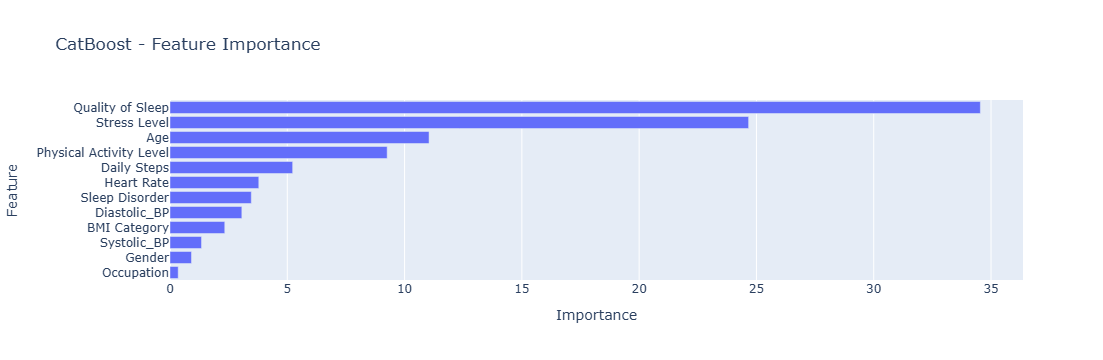

In [218]:
fig = px.bar(
    fi_cat_df,
    x='Importance',
    y='Feature',
    orientation='h',
    title='CatBoost - Feature Importance'
)
fig.update_layout(yaxis={'categoryorder': 'total ascending'})
fig.show()


Across all models, CatBoost provided the best combination of predictive accuracy and correct handling of categorical variables (MAE = 0.072, R² = 0.986). Its feature importance aligns strongly with earlier EDA findings: Quality of Sleep and Stress Level are the most influential predictors of Sleep Duration, followed by Age, Physical Activity, Heart Rate, and Daily Steps.

Random Forest with OneHotEncoder achieved a slightly higher R² but produced misleading feature importance due to high-cardinality categorical inflation. After switching to OrdinalEncoder, the Random Forest gave a much more realistic feature ranking, similar to CatBoost. This shows the importance of choosing appropriate encoding methods for tree-based models.

Overall, the results suggest that lifestyle factors and stress physiology play a dominant role in determining sleep duration, while demographics (gender, occupation) contribute minimally. Using multiple models and encoding strategies ensures both predictive accuracy and trustworthy interpretation.

## 🔵 Model Deployment Simulation: User Input-Based Prediction

In [219]:
def predict_sleep_duration_rf():
    print("Enter the following information to predict sleep duration:\n")

    # Numeric inputs
    age = int(input("Age: "))
    sleep_quality = float(input("Quality of Sleep (1–10): "))
    stress = float(input("Stress Level (1–10): "))
    activity = int(input("Physical Activity Level (minutes per day): "))
    heart_rate = int(input("Heart Rate (bpm): "))
    steps = int(input("Daily Steps: "))
    systolic = int(input("Systolic BP: "))
    diastolic = int(input("Diastolic BP: "))

    # Categorical inputs
    gender = input("Gender (Male/Female): ").strip().title()
    occupation = input("Occupation: ").strip()
    bmi = input("BMI Category (Normal, Overweight, Obese): ").strip().title()
    sleep_disorder = input("Sleep Disorder (None, Insomnia, Sleep Apnea): ").strip().title()

    # Build a DataFrame in the same column order as X
    user_df = pd.DataFrame([{
        "Person ID": 9999,   
        "Gender": gender,
        "Age": age,
        "Occupation": occupation,
        "Sleep Duration": 0.0,  
        "Quality of Sleep": sleep_quality,
        "Physical Activity Level": activity,
        "Stress Level": stress,
        "BMI Category": bmi,
        "Heart Rate": heart_rate,
        "Daily Steps": steps,
        "Sleep Disorder": sleep_disorder,
        "Systolic_BP": systolic,
        "Diastolic_BP": diastolic
    }])

    # Make sure columns match the features X used for rf_tree_model
    # If X does NOT include Person ID and Sleep Duration, adjust to:
    user_df = user_df[X.columns]  # align columns exactly with training features

    # Predict using the Random Forest + OrdinalEncoder pipeline
    prediction = rf_tree_model.predict(user_df)[0]

    print("\n---------------------------------------")
    print("Input features:")
    print(user_df.iloc[0])
    print("---------------------------------------")
    print(f"Predicted Sleep Duration: {prediction:.2f} hours")
    print("---------------------------------------")

# Run it
predict_sleep_duration_rf()


Enter the following information to predict sleep duration:



Age:  23
Quality of Sleep (1–10):  3
Stress Level (1–10):  8
Physical Activity Level (minutes per day):  20
Heart Rate (bpm):  90
Daily Steps:  20
Systolic BP:  90
Diastolic BP:  130
Gender (Male/Female):  female
Occupation:  Doctor
BMI Category (Normal, Overweight, Obese):  Obese
Sleep Disorder (None, Insomnia, Sleep Apnea):  None



---------------------------------------
Input features:
Gender                     Female
Age                            23
Occupation                 Doctor
Quality of Sleep              3.0
Physical Activity Level        20
Stress Level                  8.0
BMI Category                Obese
Heart Rate                     90
Daily Steps                    20
Sleep Disorder               None
Systolic_BP                    90
Diastolic_BP                  130
Name: 0, dtype: object
---------------------------------------
Predicted Sleep Duration: 6.22 hours
---------------------------------------


In [221]:
#pip install gradio

In [222]:
import gradio as gr
import pandas as pd

# Make sure this matches X.columns exactly
print(X.columns.tolist())


['Gender', 'Age', 'Occupation', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate', 'Daily Steps', 'Sleep Disorder', 'Systolic_BP', 'Diastolic_BP']


In [223]:
def predict_sleep_duration_gradio(
    gender,
    age,
    occupation,
    sleep_quality,
    stress,
    activity,
    bmi_category,
    heart_rate,
    daily_steps,
    sleep_disorder,
    systolic_bp,
    diastolic_bp
):
    # Build a single-row DataFrame in the same structure as X
    user_df = pd.DataFrame([{
        "Gender": gender,
        "Age": age,
        "Occupation": occupation,
        "Quality of Sleep": sleep_quality,
        "Physical Activity Level": activity,
        "Stress Level": stress,
        "BMI Category": bmi_category,
        "Heart Rate": heart_rate,
        "Daily Steps": daily_steps,
        "Sleep Disorder": sleep_disorder,
        "Systolic_BP": systolic_bp,
        "Diastolic_BP": diastolic_bp
    }])

    # Align column order with training data
    user_df = user_df[X.columns]

    # Predict using the trained Random Forest pipeline
    prediction = rf_tree_model.predict(user_df)[0]

    return f"Predicted Sleep Duration: {prediction:.2f} hours"


## Sleep Duration Prediction GUI

In [224]:
gender_input = gr.Dropdown(
    choices=["Male", "Female"],
    label="Gender"
)

age_input = gr.Number(label="Age (years)", value=40)

occupation_input = gr.Dropdown(
    choices=[
        "Accountant", "Doctor", "Engineer", "Lawyer",
        "Manager", "Nurse", "Sales Representative",
        "Salesperson", "Scientist", "Software Engineer",
        "Teacher"
    ],
    label="Occupation"
)

sleep_quality_input = gr.Slider(1, 10, value=7, step=0.5, label="Quality of Sleep (1–10)")
stress_input = gr.Slider(1, 10, value=5, step=0.5, label="Stress Level (1–10)")
activity_input = gr.Number(label="Physical Activity Level (minutes/day)", value=45)
bmi_input = gr.Dropdown(
    choices=["Normal", "Overweight", "Obese", "Normal Weight"],
    label="BMI Category"
)
heart_rate_input = gr.Number(label="Heart Rate (bpm)", value=70)
steps_input = gr.Number(label="Daily Steps", value=7000)
sleep_disorder_input = gr.Dropdown(
    choices=["None", "Insomnia", "Sleep Apnea"],
    label="Sleep Disorder"
)
systolic_input = gr.Number(label="Systolic BP (mmHg)", value=120)
diastolic_input = gr.Number(label="Diastolic BP (mmHg)", value=80)

demo = gr.Interface(
    fn=predict_sleep_duration_gradio,
    inputs=[
        gender_input,
        age_input,
        occupation_input,
        sleep_quality_input,
        stress_input,
        activity_input,
        bmi_input,
        heart_rate_input,
        steps_input,
        sleep_disorder_input,
        systolic_input,
        diastolic_input
    ],
    outputs=gr.Textbox(label="Prediction"),
    title="Sleep Duration Prediction App",
    description="Enter lifestyle and health information to predict expected sleep duration (in hours) using a Random Forest model."
)

demo.launch()


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.
